<a href="https://colab.research.google.com/github/capajaro/DSP_Project/blob/main/Proyecto_Final_DSP_UN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.fft as ft
import timeit as tm


In [11]:
samplerate_Metallica, Metallica_Data = wavfile.read('/content/Metallica.wav')
samplerate_Mozart, Mozart_Data = wavfile.read('/content/Mozart.wav')
samplerate_Nirvana, Nirvana_Data = wavfile.read('/content/Nirvana.wav')

number of channels Metallica= 2
length Metallica= 15.0s
samplerate Metallica: 32000


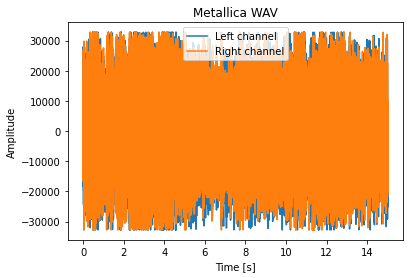

In [20]:
print(f"number of channels Metallica= {Metallica_Data.shape[1]}")

length = Metallica_Data.shape[0] / samplerate_Metallica
print(f"length Metallica= {length}s")

print('samplerate Metallica: %0.0f' %(samplerate_Metallica))

time = np.linspace(0., length, Metallica_Data.shape[0])
plt.plot(time, Metallica_Data[:, 0], label="Left channel")
plt.plot(time, Metallica_Data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Metallica WAV")
plt.show()


number of channels Mozart= 2
length Mozart= 25.0s
samplerate Mozart: 44100


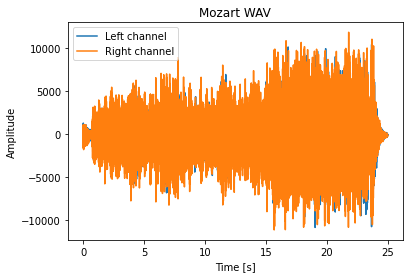

In [21]:
print(f"number of channels Mozart= {Mozart_Data.shape[1]}")

length = Mozart_Data.shape[0] / samplerate_Mozart
print(f"length Mozart= {length}s")

print('samplerate Mozart: %0.0f' %(samplerate_Mozart))

time = np.linspace(0., length, Mozart_Data.shape[0])
plt.plot(time, Mozart_Data[:, 0], label="Left channel")
plt.plot(time, Mozart_Data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Mozart WAV")
plt.show()


number of channels Nirvana= 2
length Nirvana= 10.0s
samplerate Nirvana: 32000


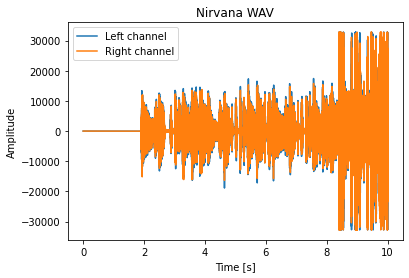

In [22]:
print(f"number of channels Nirvana= {Nirvana_Data.shape[1]}")

length = Nirvana_Data.shape[0] / samplerate_Nirvana
print(f"length Nirvana= {length}s")

print('samplerate Nirvana: %0.0f' %(samplerate_Nirvana))

time = np.linspace(0., length, Nirvana_Data.shape[0])
plt.plot(time, Nirvana_Data[:, 0], label="Left channel")
plt.plot(time, Nirvana_Data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Nirvana WAV")
plt.show()


In [9]:
Metallica_Data = pd.DataFrame(Metallica_Data)
Mozart_Data = pd.DataFrame(Mozart_Data)
Nirvana_Data = pd.DataFrame(Nirvana_Data)

In [10]:
Metallica_Data.head()

,0,1
0,-3227,-10488
1,2806,-5424
2,6653,-1959
3,11646,2830
4,10480,1806


## AYUDA Código Profesor

In [ ]:

#%%
N = 56 #Filter order
wc = 0.25 #Cutoff frequency
M = 200 #Input buffer
L = N + M #FFT size

buff_FIR_I = np.zeros((N,)) #Buffer for FIR_I
buff_FIR_T = np.zeros((N,)) #Buffer for FIR_Transposed
buff_OLA = np.zeros((N,)) #Buffer for FIR_FFT

#%%
def IdealLPF(wc,L):
    n = np.arange(0,L+1)
    h = wc*np.sinc(wc*(n-(L/2)))
    return h;

#%%
def FIR_FFT(x,H):
    y = np.real(ft.ifft(ft.fft(x,len(H))*H))
    return y;

#%%
def FIR_I(x,h):
    y = x*h[0] + np.sum(buff_FIR_I*h[1:])
    buff_FIR_I[1:] = buff_FIR_I[0:N-1]
    buff_FIR_I[0] = x
    return y;
   
#%%     
def FIR_T(x,h):
    temp = x*h
    y = temp[0]+buff_FIR_T[N-1];
    buff_FIR_T[1:] = buff_FIR_T[0:N-1]+temp[N-1:0:-1]
    buff_FIR_T[0] = temp[N]
    return y; 

#%%    
#Get an impulse response for testing
filt = IdealLPF(wc,N)
filt_f = ft.fft(filt,L)
w = ft.fftshift(ft.fftfreq(filt_f.size,1/2))
plt.figure()
plt.subplot(2,1,1)
plt.plot(filt)
plt.title('LPF impulse response')
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(w,20*np.log10(np.abs(ft.fftshift(filt_f))))
plt.title('LPF frequency response')
plt.grid(True)

#%%
#Create a test signal
f1 = 750
f2 = 7000
fs = 16000
t = np.arange(0,16000)*(1/fs);
test = 0.5*np.cos(2*np.pi*f1*t) + 0.5*np.cos(2*np.pi*f2*t)
test_f = ft.fftshift(ft.fft(test))
w = ft.fftshift(ft.fftfreq(test_f.size,1/2))

#%%
#FIR FFT filtering
y_fir_fft = np.zeros(test.size)
tic = tm.default_timer()
for i in np.arange(0,len(test),M):
    buf = FIR_FFT(test[i:i+M],filt_f)
    y_fir_fft[i:i+M] = buf[0:M]
    y_fir_fft[i:i+N] = y_fir_fft[i:i+N] + buff_OLA
    buff_OLA = buf[M:]
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_fft_f = ft.fftshift(ft.fft(y_fir_fft))

#%%
#FIR I filtering
y_fir_i = np.zeros(test.size)
tic = tm.default_timer()
for i in range(len(test)):
    y_fir_i[i] = FIR_I(test[i],filt)
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_i_f = ft.fftshift(ft.fft(y_fir_i))

#%%
#FIR transposed filtering
y_fir_t = np.zeros(test.size)
tic = tm.default_timer()
for i in range(len(test)):
    y_fir_t[i] = FIR_T(test[i],filt)
toc = tm.default_timer()
#Approx. filtering time
print(toc-tic)
y_fir_t_f = ft.fftshift(ft.fft(y_fir_t))

#%%
#Time and frequency plots
plt.figure()
plt.subplot(4,2,1)
plt.plot(t,test)
plt.title('Input signal (time domain)')
plt.subplot(4,2,3)
plt.plot(t,y_fir_i)
plt.title('Output signal with FIR I filter (time domain)')
plt.subplot(4,2,5)
plt.plot(t,y_fir_t)
plt.title('Output signal with FIR Transposed filter (time domain)')
plt.subplot(4,2,7)
plt.plot(t,y_fir_fft)
plt.title('Output signal with FIR FFT filter (time domain)')
plt.subplot(4,2,2)
plt.plot(w,np.abs(test_f))
plt.title('Input signal (freq. domain)')
plt.grid(True)
plt.subplot(4,2,4)
plt.plot(w,np.abs(y_fir_i_f))
plt.title('Output signal with FIR I filter (freq. domain)')
plt.grid(True)
plt.subplot(4,2,6)
plt.plot(w,np.abs(y_fir_t_f))
plt.title('Output signal with FIR Transposed filter (freq. domain)')
plt.grid(True)
plt.subplot(4,2,8)
plt.plot(w,np.abs(y_fir_fft_f))
plt.title('Output signal with FIR FFT filter (freq. domain)')
plt.grid(True)

#%%
print(sum(abs(y_fir_i-y_fir_t)))
print(sum(abs(y_fir_i-y_fir_fft)))
print(sum(abs(y_fir_t-y_fir_fft)))